In [2]:
from pycap import PropertyTree, Charge, Discharge
import sys
sys.path.append('/notebooks')
from ragone import RagoneAnalysis, plot_ragone
from battery import Dualfoil
from matplotlib import pyplot
from pycap import initialize_data, plot_data
from pickle import dump, load
import numpy as np
from pickle import dump, load

%matplotlib inline

In [3]:
df = Dualfoil(path='../docker/dualfoil5-1/')
v = df.get_voltage()
ptree = PropertyTree()

### Cap-run Ragone plot
ragone.py altered to be more reasonable for Dualfoil

Notes:
+ Decreasing `time_step` aids with convergence on higher power discharges
+ The charge portion of RagoneAnalysis takes up most of the computational time

In [17]:
# ragone
ptree.put_double('discharge_power_lower_limit', 1250.0)
ptree.put_double('discharge_power_upper_limit', 1500.0)
ptree.put_int('steps_per_decade', 15)
ptree.put_int('min_steps_per_discharge', 10)
ptree.put_int('max_steps_per_discharge', 20)
ptree.put_double('time_step', 10.0)
ptree.put_double('initial_voltage', v)
ptree.put_double('final_voltage', v-1)

In [18]:
ragone = RagoneAnalysis(ptree)

df.reset()
%time ragone.run(df)

Charge: 0.4955203652381897 min
Failed to discharge at 1250.0 watt
CPU times: user 260 ms, sys: 1.02 s, total: 1.28 s
Wall time: 8min 16s


In [15]:
with open('data_dumps/ragone_250-1500.dat', 'wb') as fout:
    dump(ragone._data, fout)

In [23]:
# combine previous data dumps to combine plots

data1 = load(open('data_dumps/ragone_400-1200.dat', 'rb'))
data2 = load(open('data_dumps/ragone_1250-1500.dat', 'rb'))

ragone_data = data1.copy()
ragone_data['power'] = np.append(ragone_data['power'], data2['power'])
ragone_data['energy'] = np.append(ragone_data['energy'], data2['energy'])

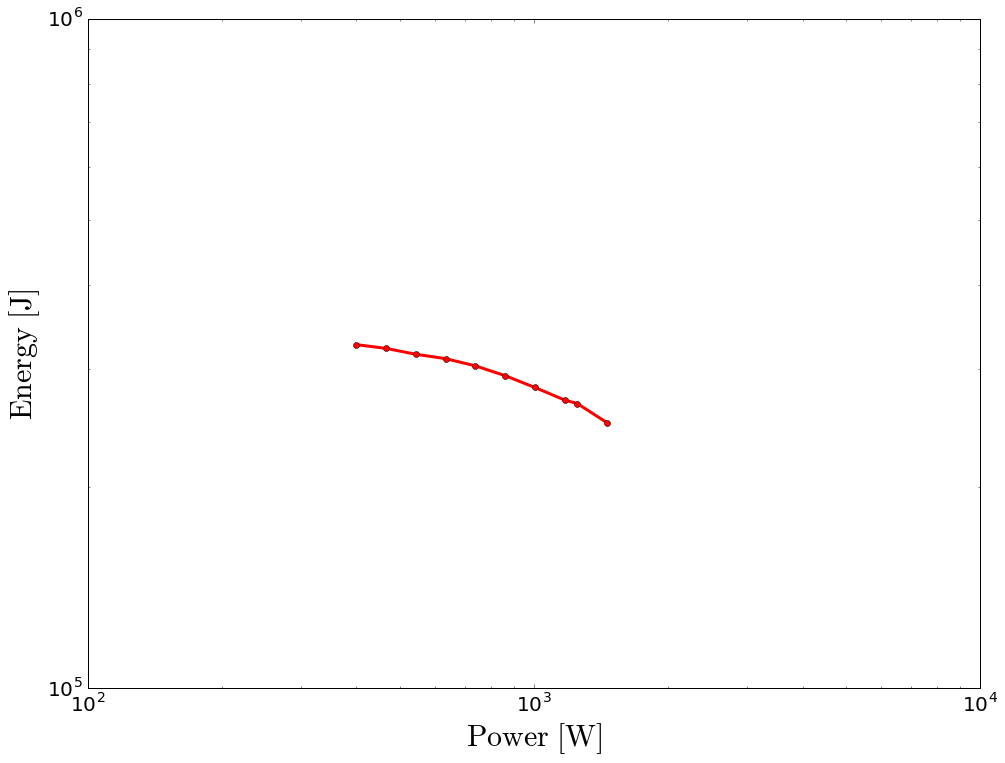

In [24]:
plot_ragone(ragone_data)

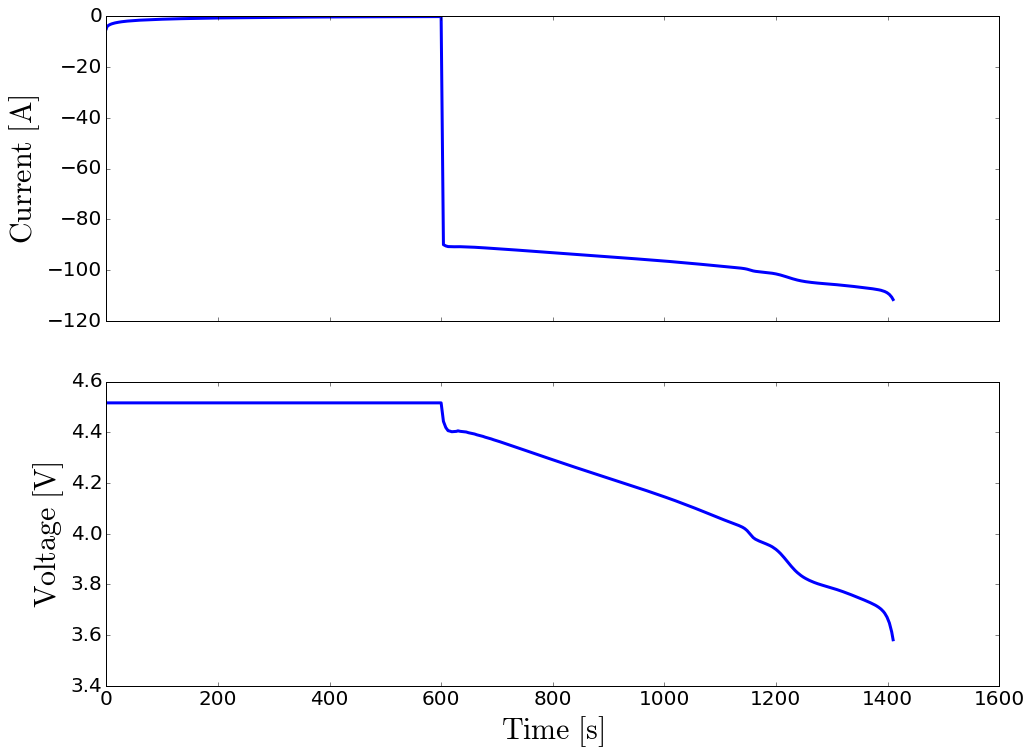

In [10]:
# plot the full current and voltage data over time

data = initialize_data()
otpt = df.outbot.output.copy()
data['time'] = np.array(otpt['time']) * 60
data['voltage'] = otpt['voltage']
data['current'] = otpt['current']

plot_data(data)